In [37]:
!pip install apple-health-exporter

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [38]:
# Translates zipped apple health data into a feather file
!python3 -m apple_health_exporter export.zip data.feather

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import numpy as np

In [40]:
def camelCaseSplit(s):
    return re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', s)

In [41]:
# Fixes font size for graphs
font = {'weight' : 'bold',
        'size'   : 6}

matplotlib.rc('font', **font)

In [42]:
data = pd.read_feather('data.feather')

In [43]:
# Finds all the categories in data.feather
categories = []
indexes = []
for category in range(len(data)):
    if data.iloc[category][0] not in categories:
        categories.append(data.iloc[category][0])
        indexes.append([data.iloc[category][0], category])

In [44]:
def createPlot(index):
    
    # Sets up graph configs
    fig = plt.figure()
    fig.set_dpi(150)
    axis1 = fig.add_subplot()
    ylabel = indexes[index][0]
    ylabel = ylabel.replace('HKQuantityTypeIdentifier', '')
    ylabel = ' '.join(camelCaseSplit(ylabel))
    axis1.set_ylabel(ylabel)
    axis1.set_xlabel('Date')
    axis1.set_title('Plotted')
    
    # Assigns proper value arrays to dateData & valueData
    dateData = data.iloc[indexes[index][1]:indexes[index+1][1]]['startDate']
    valueData = data.iloc[indexes[index][1]:indexes[index+1][1]]['value']
    axis1.scatter(dateData, valueData, s=2)
    
    plt.show()

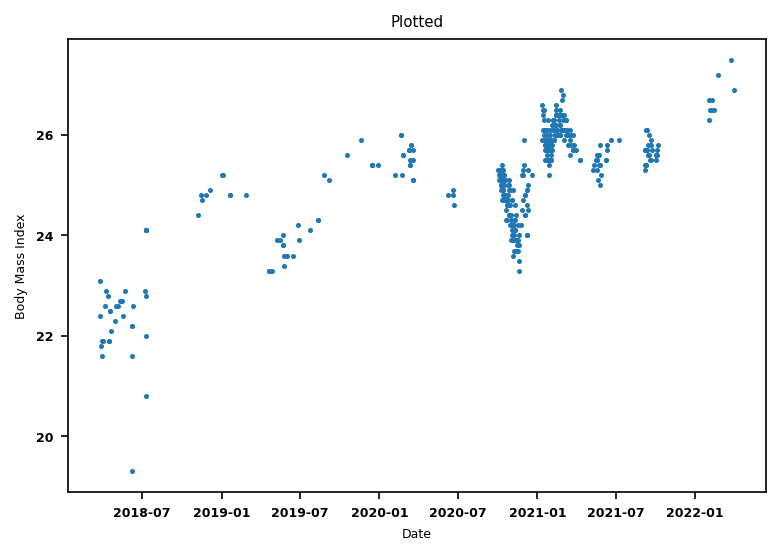

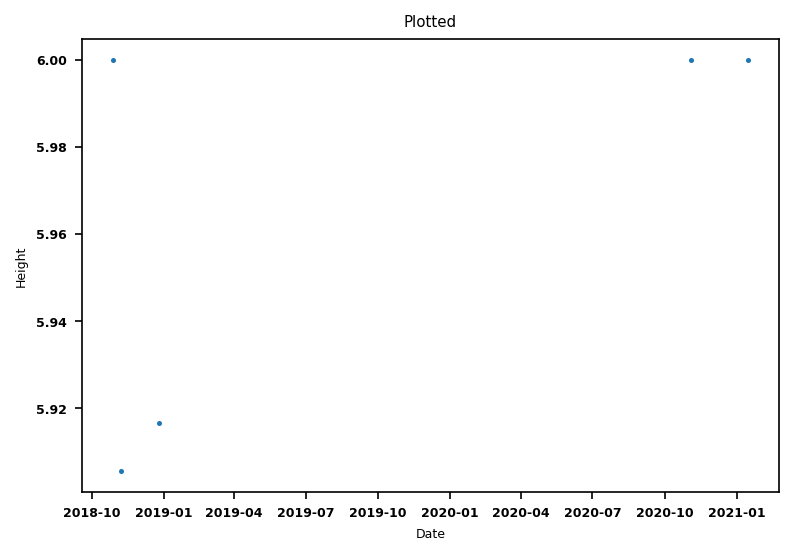

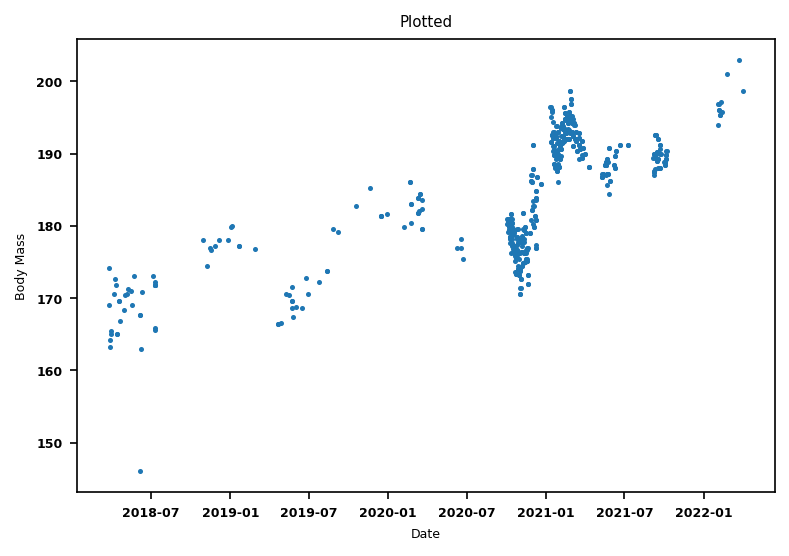

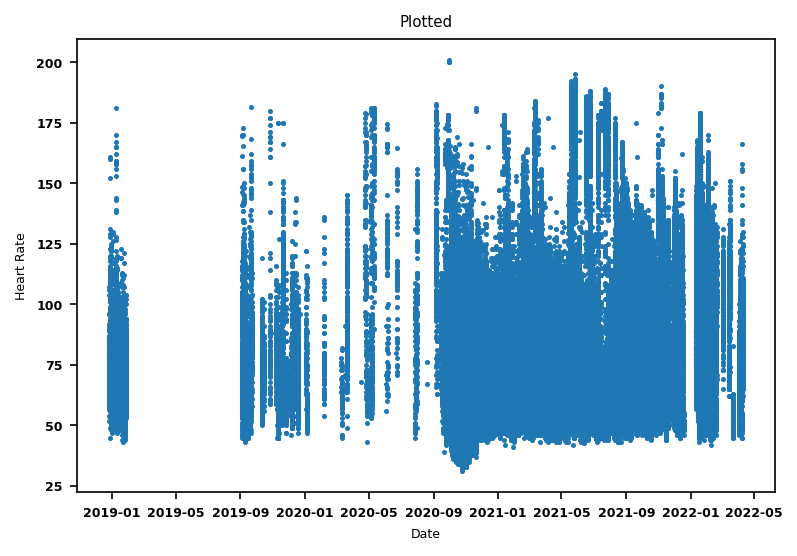

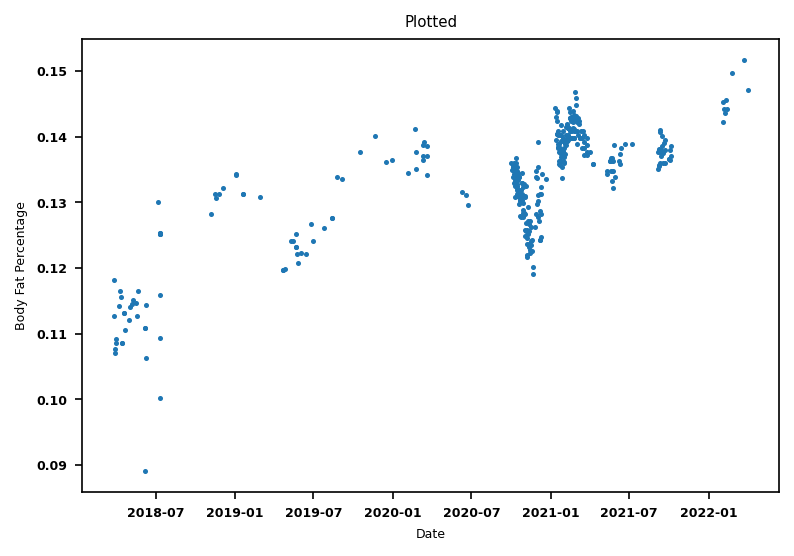

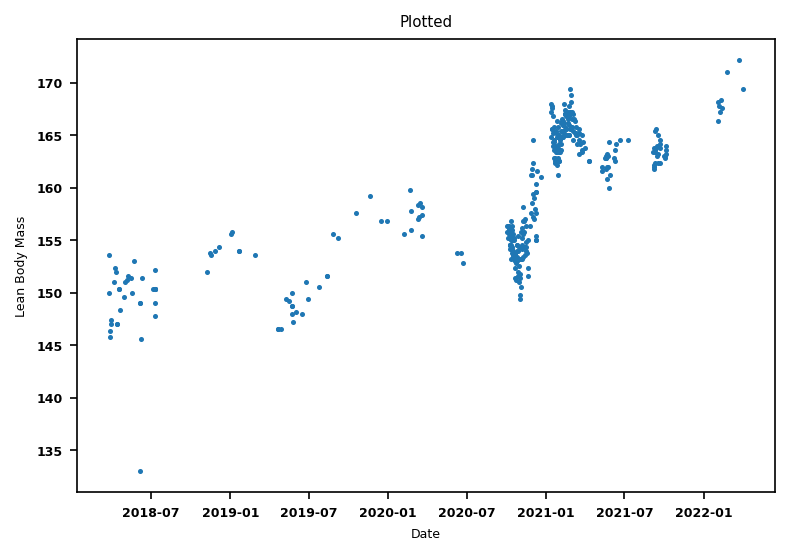

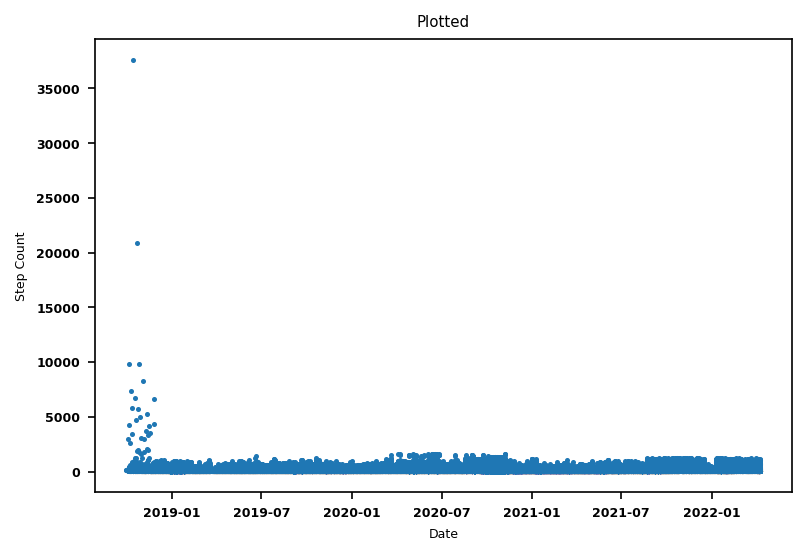

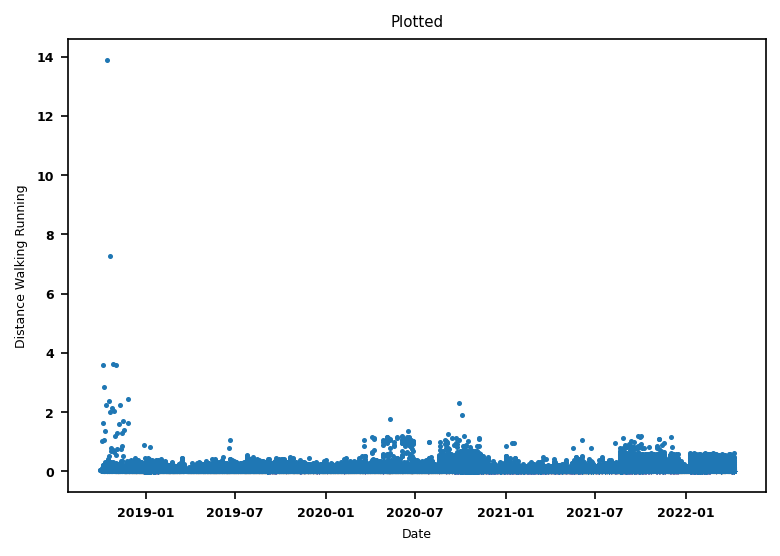

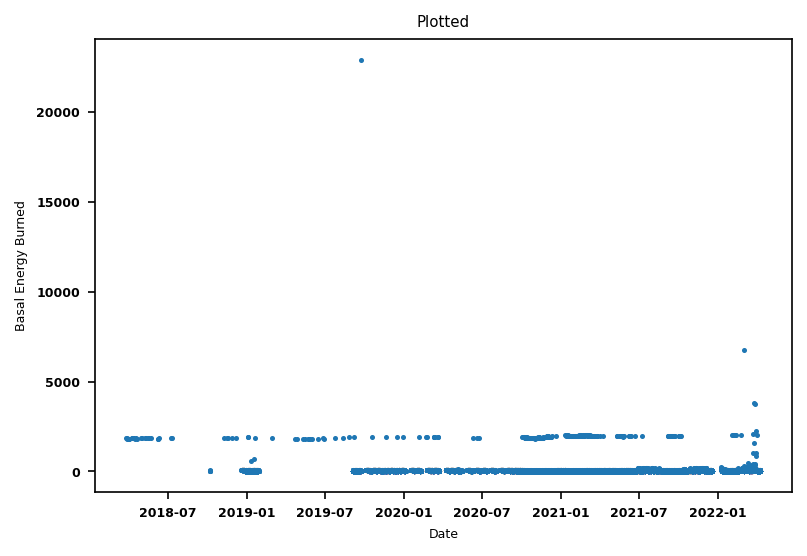

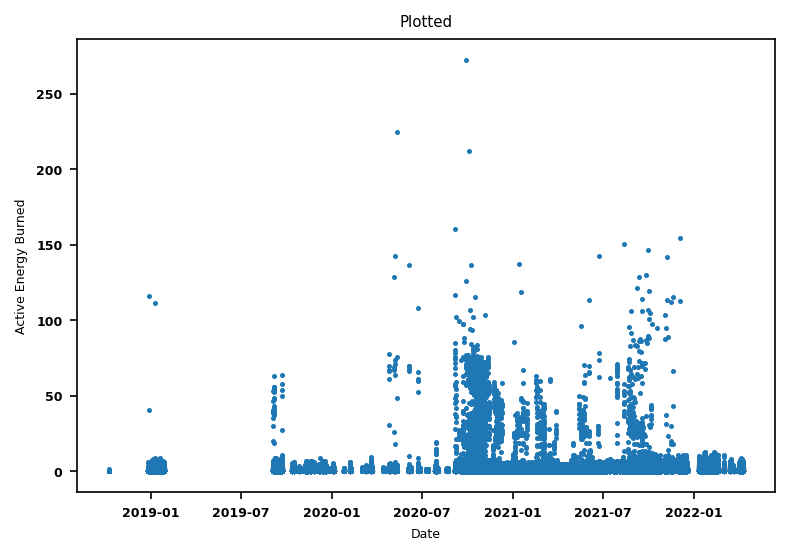

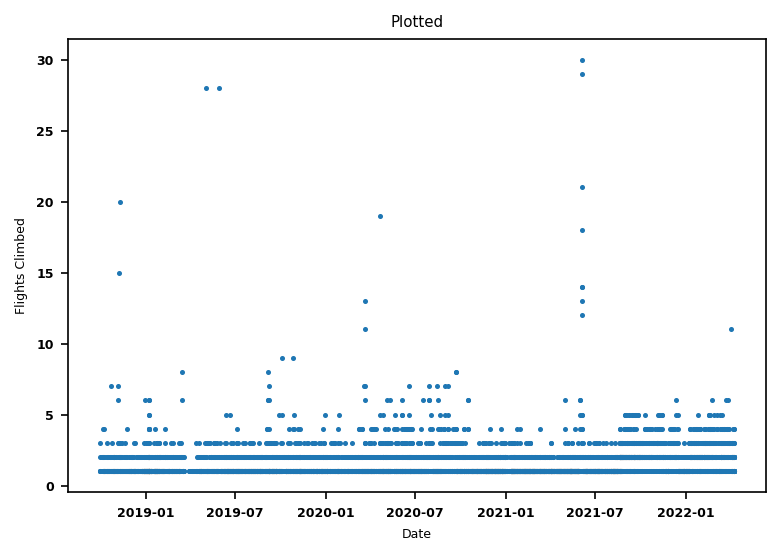

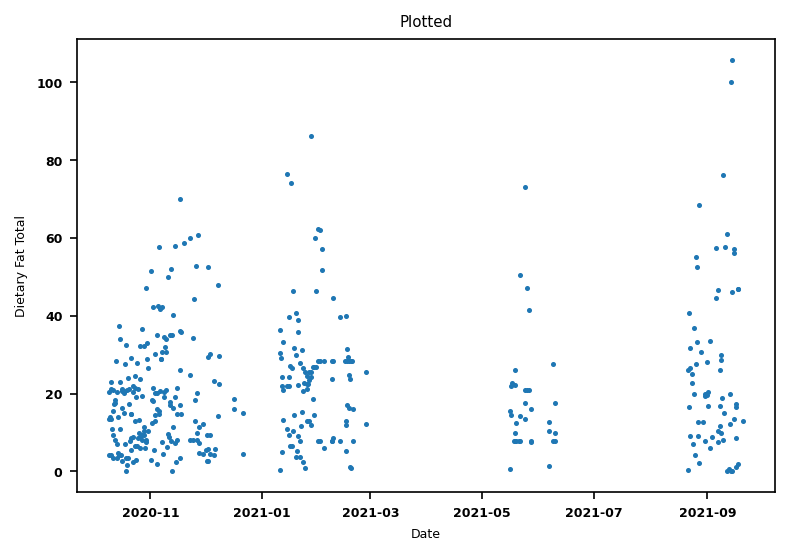

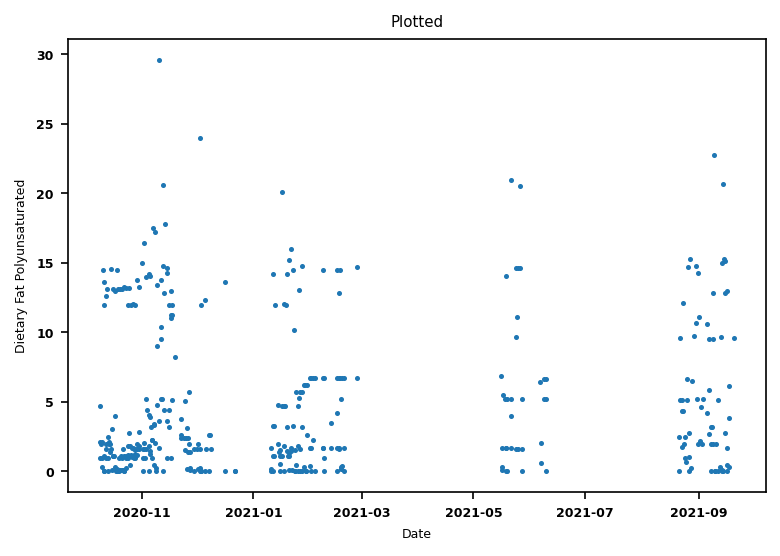

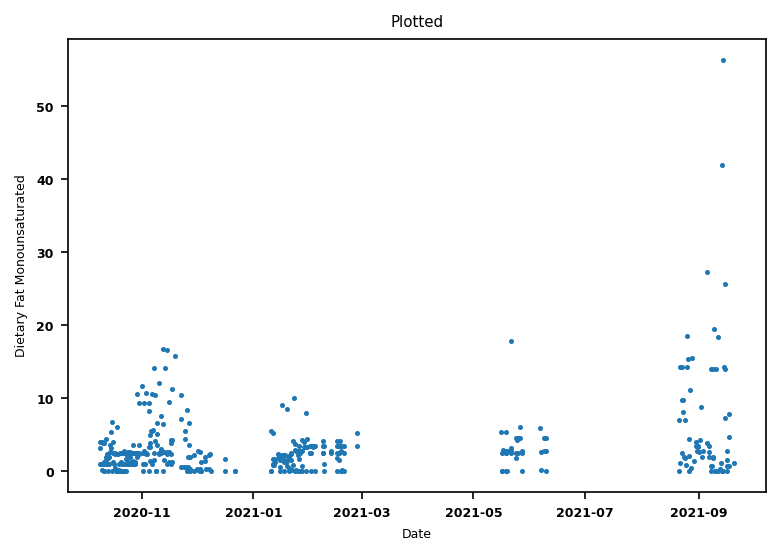

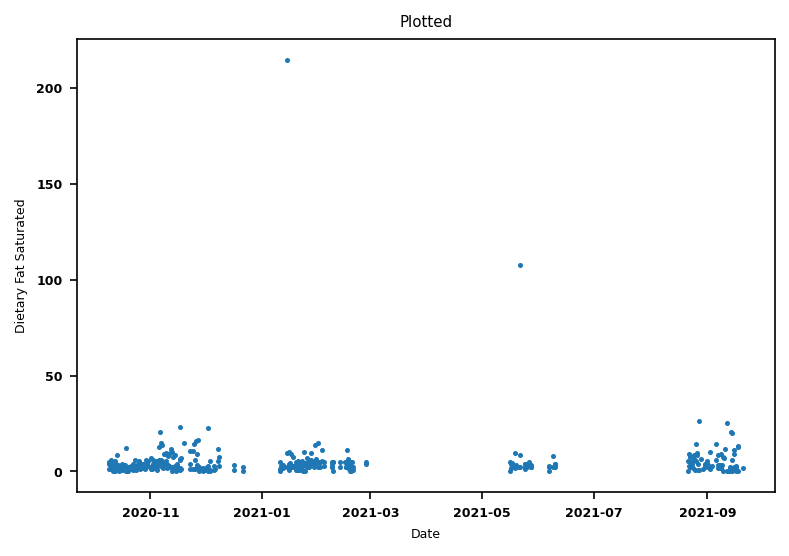

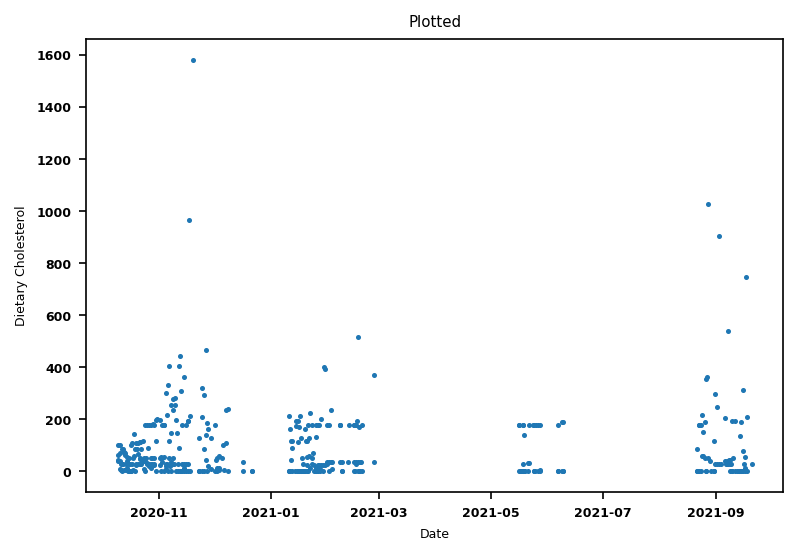

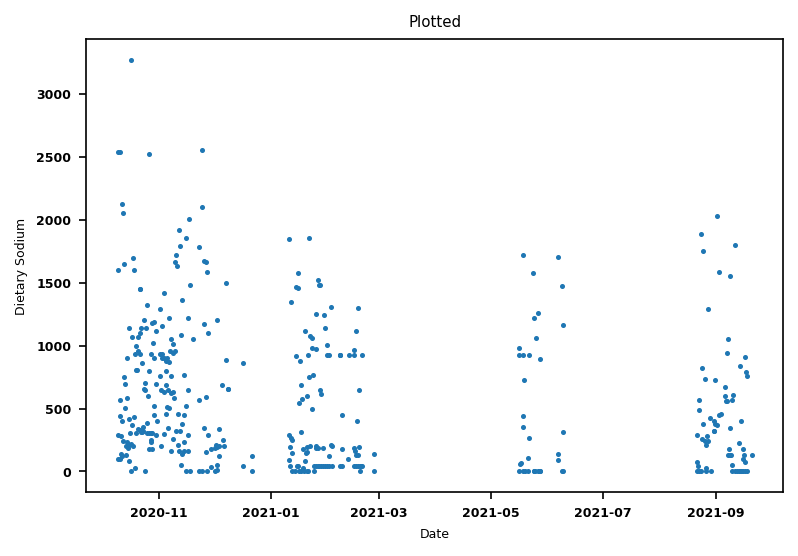

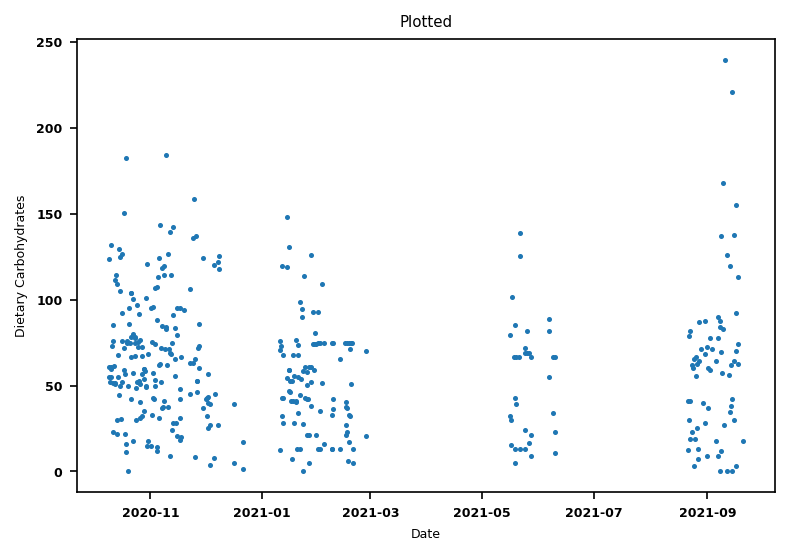

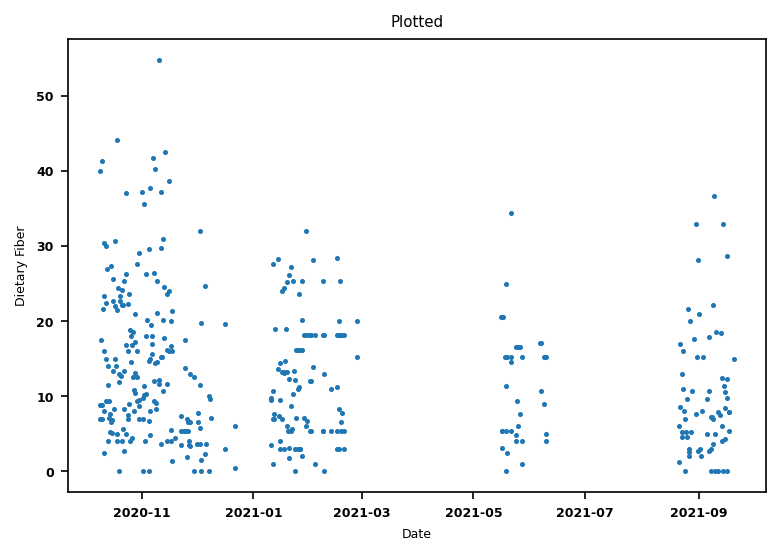

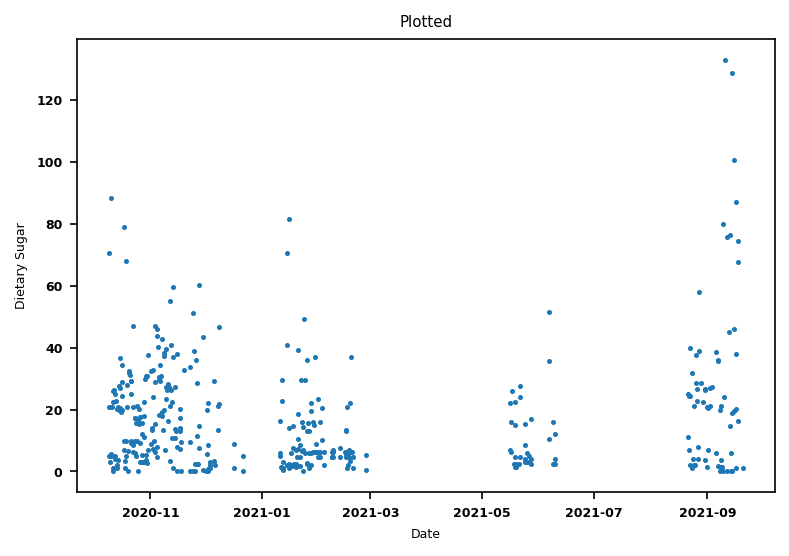

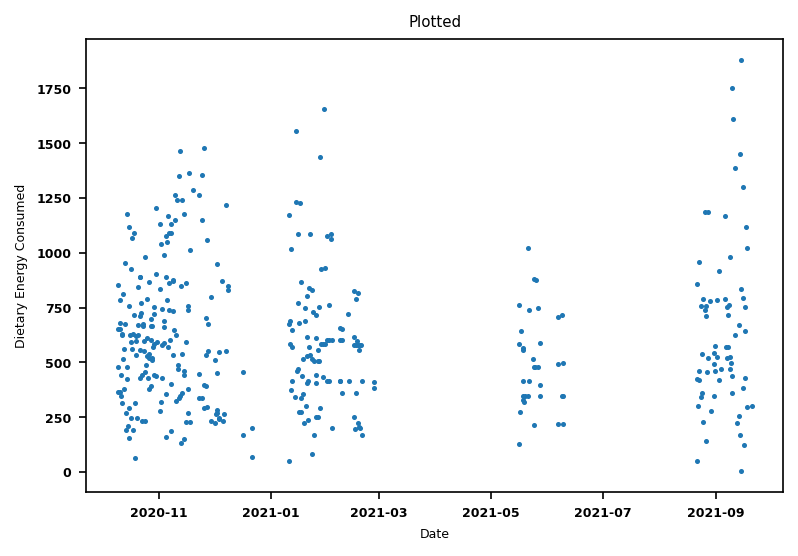

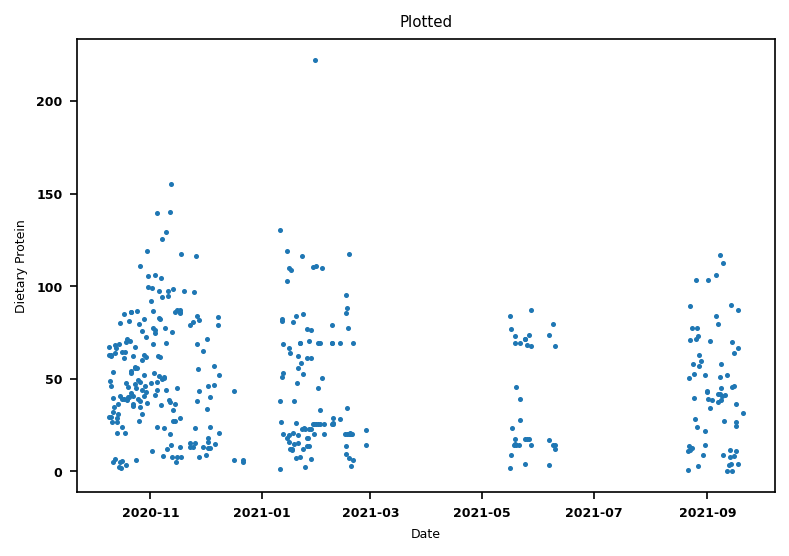

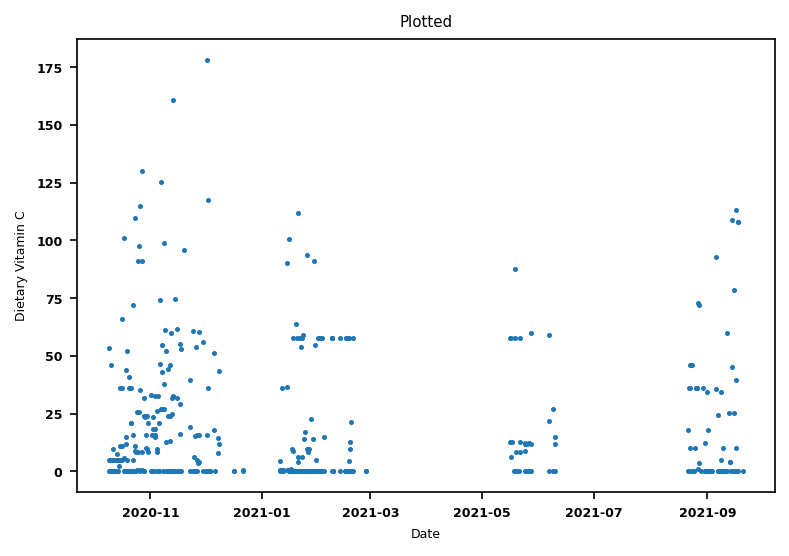

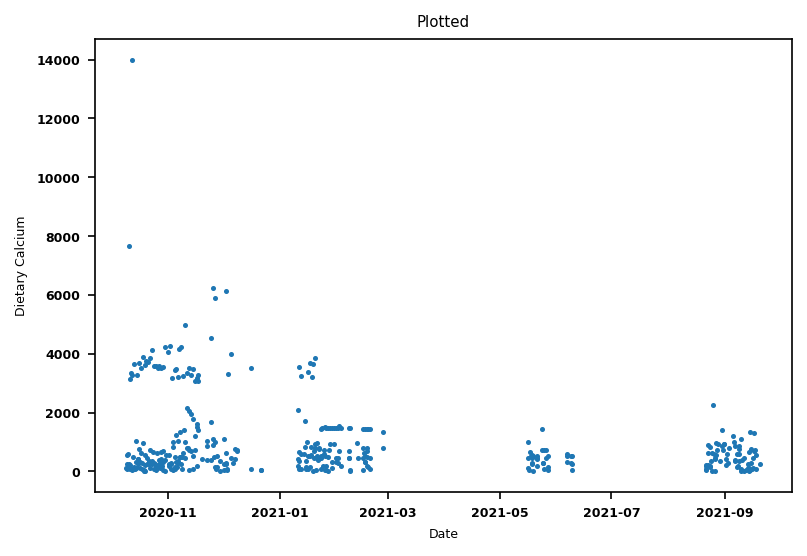

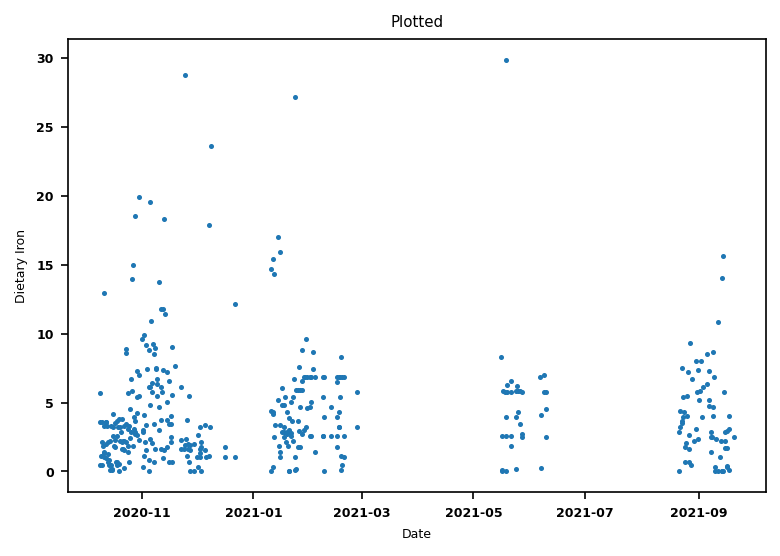

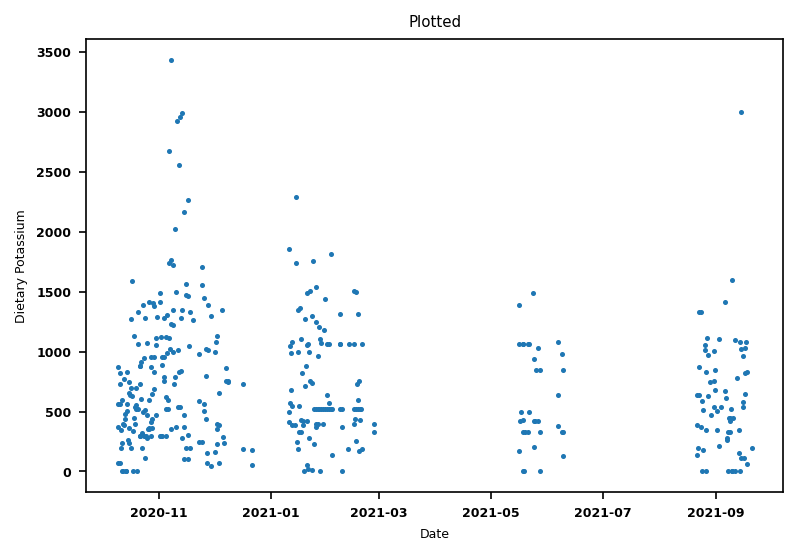

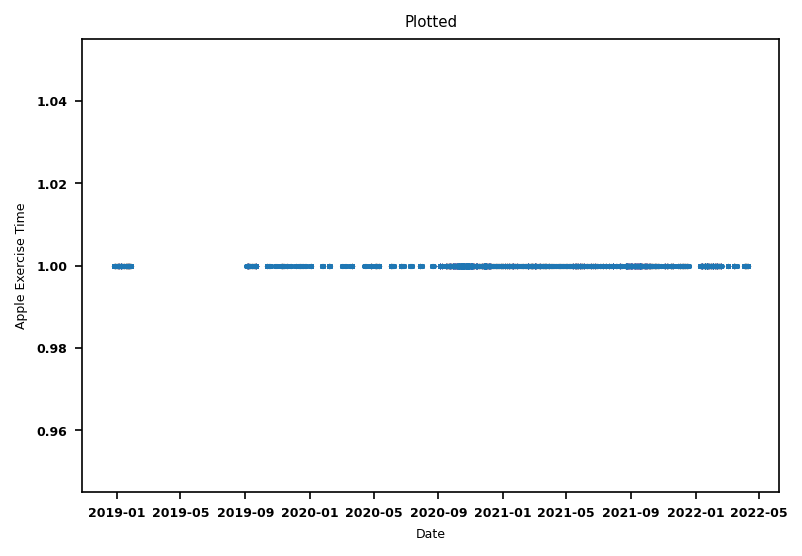

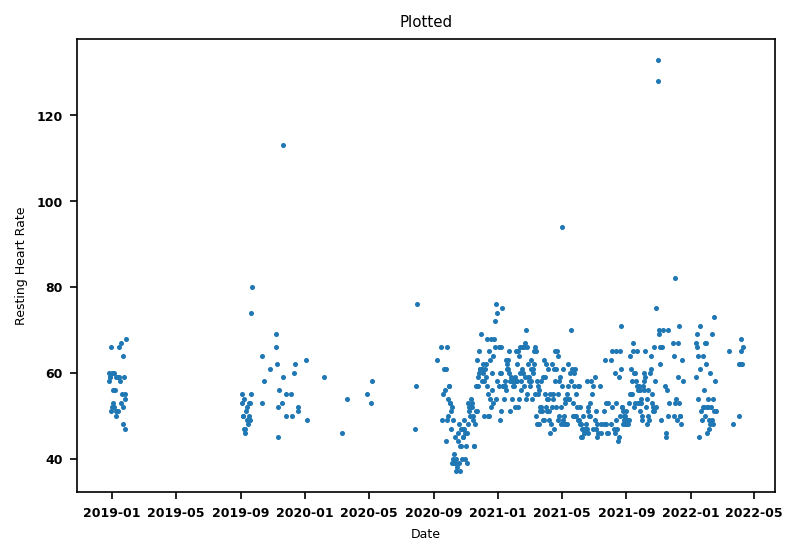

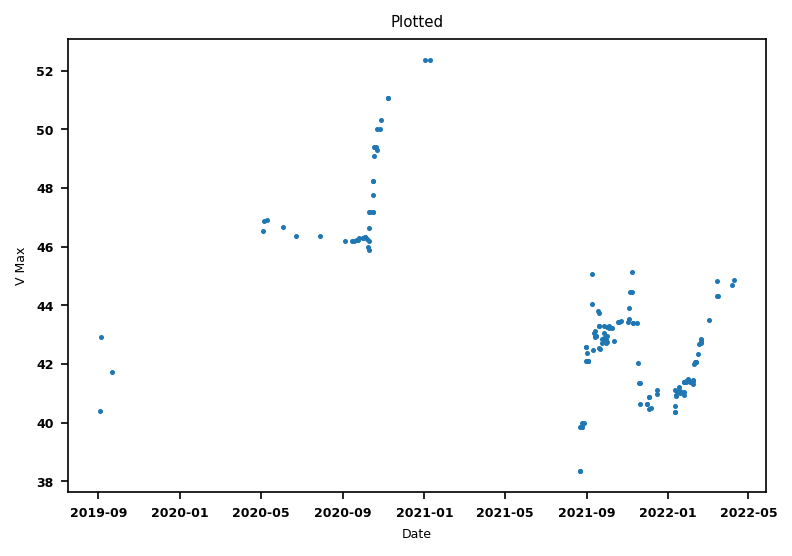

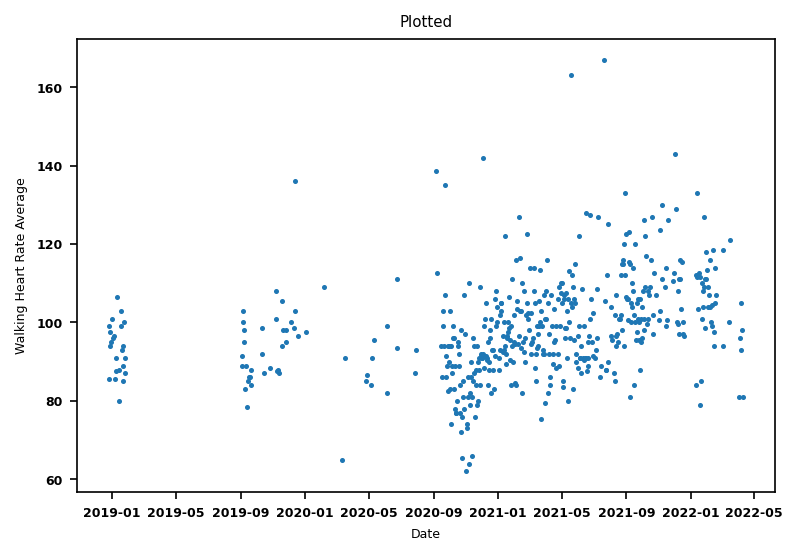

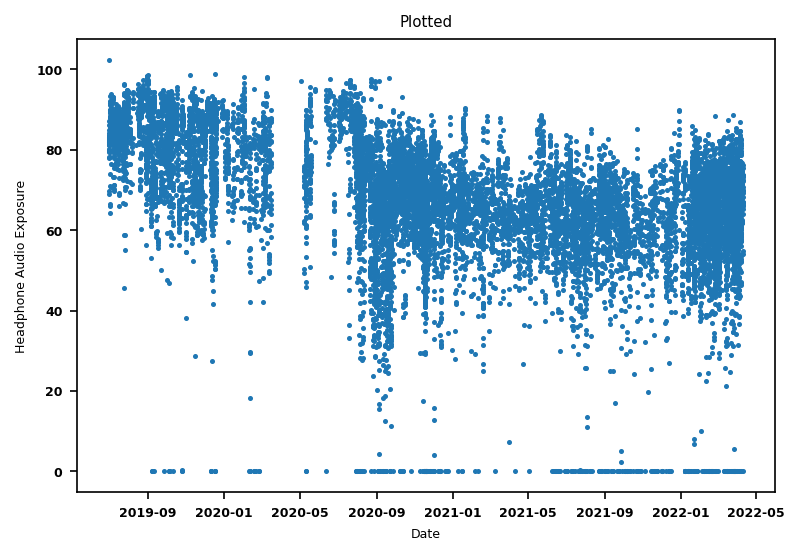

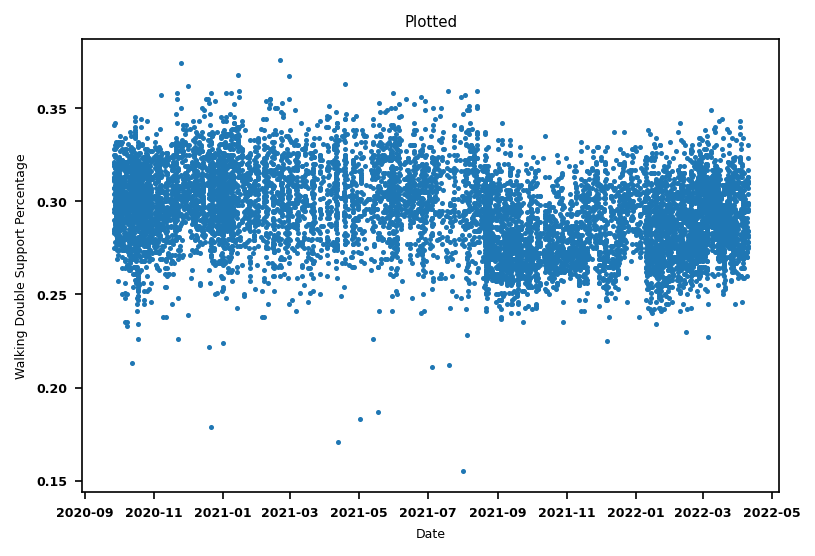

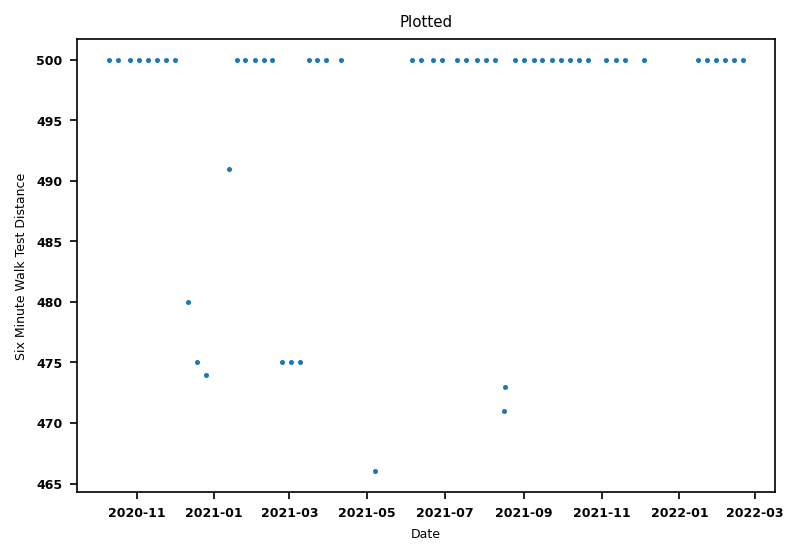

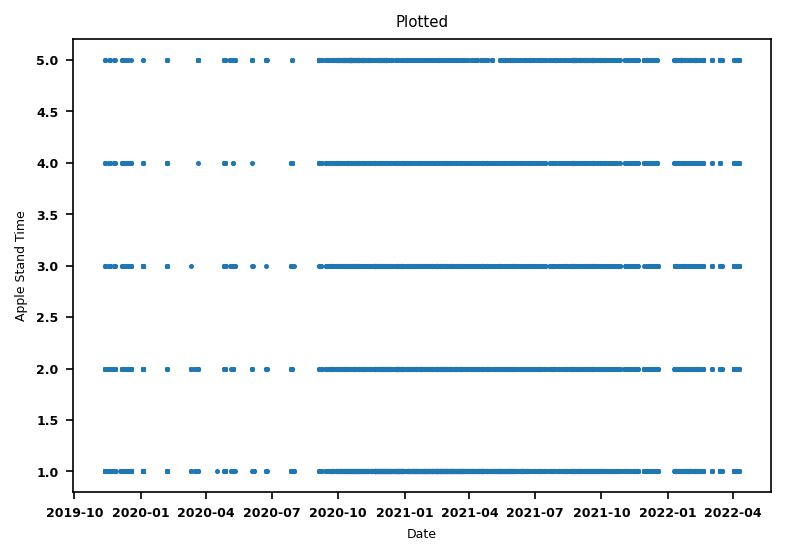

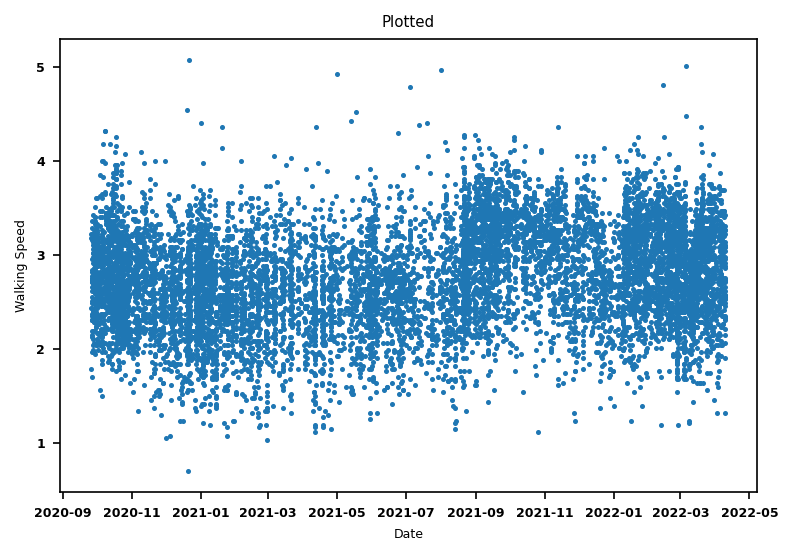

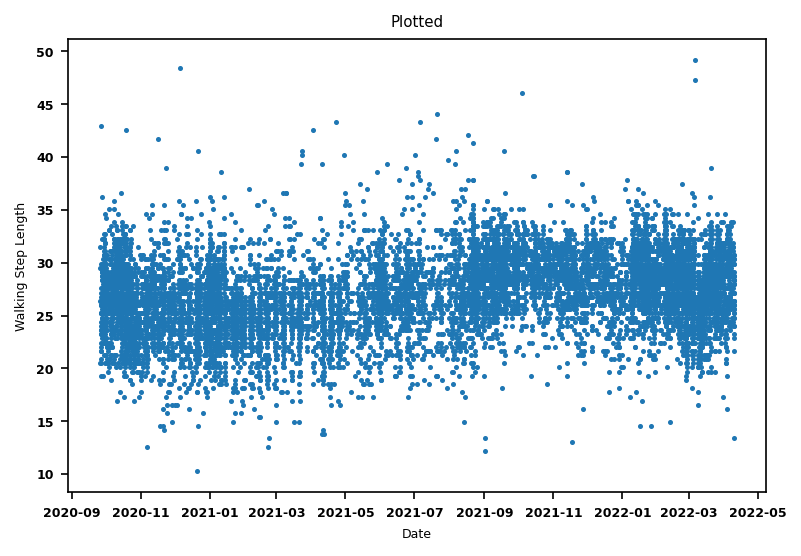

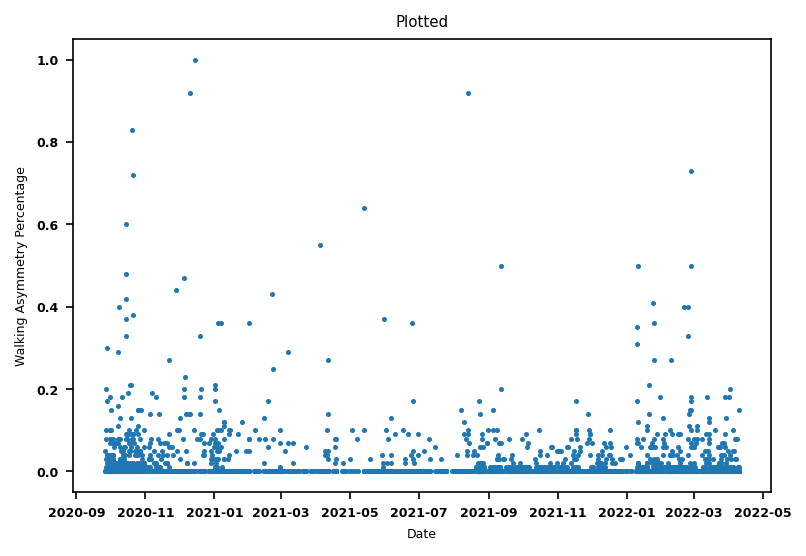

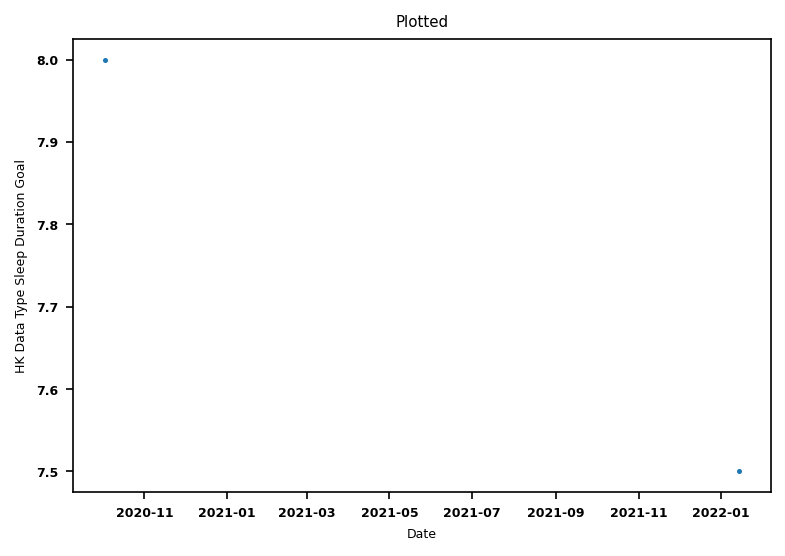

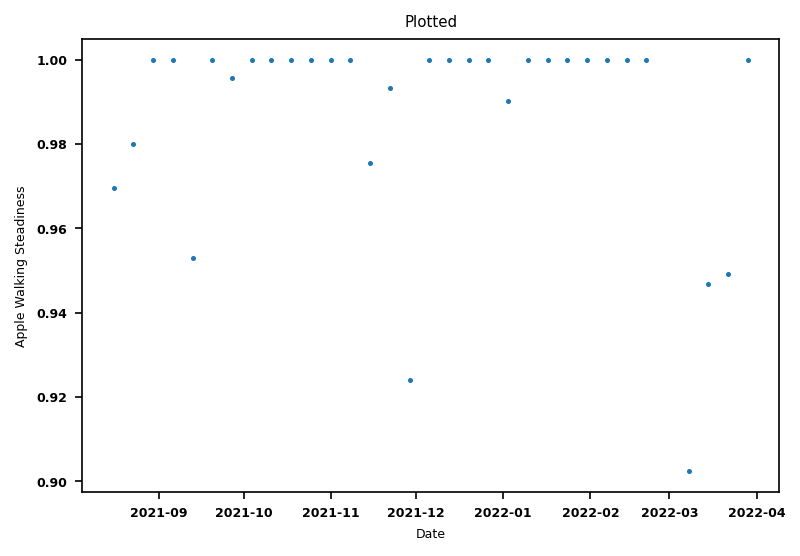

In [45]:
# Iterates through data and plots each category
for i in range(len(indexes)-1):
    createPlot(i)